# N2O ePS + ePSproc preliminary multi-orb analysis: core 1s events (pt 1)
29/09/20

15/11/20 - modified for N(1s) threshold, [for 550 - 620eV see original version on ePSdata](https://phockett.github.io/ePSdata/N2O-preliminary/N2O_1s_core_preliminary_ePSproc_290920.html).

Paul Hockett

*** Preliminary results.

## Background

Basic analysis of N2O ePolyScat results for core ionization events, O(1s) and N(1s). For backgound and methods, see [ePSdata overview](https://phockett.github.io/ePSdata/about.html), [ePSdata methods](https://phockett.github.io/ePSdata/methods.html) and [ePS/ePSproc tutorial docs](https://epsproc.readthedocs.io/en/latest/ePS_ePSproc_tutorial/ePS_tutorial_080520.html).

Pt 1: analysis of basic photoionization properties and matrix elements (this doc).

Pt 2: angle-resolved observables (in progress).

To do list:

- Check electronic structure outputs vs. known thresholds. (From fig. 4 in the PRP it looks like the O(1s) results are shifted up by ~20eV, TBC.)
- Analyse ePS computational precision (via gauge results).
- Estimate accuracy of photoionization properties by comparison with experimental data. (Cf. [recent XeF2 results](https://phockett.github.io/ePSdata/XeF2-preliminary/XeF2_multi-orb_comparisons_270320-dist.html#Comparison-with-expt.) - good, but required ~9eV energy shift, reasons TBC.)
- Finish pt 2.

## Setup

### Env

In [1]:
!hostname

Stimpy


In [2]:
!conda env list

# conda environments:
#
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\dataVis3D
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\dataVis3D-yt
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSpkgTest2
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\fibre-sim
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ipykernel_py2
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\pkgTest
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\pypi-test
                        

### Load modules

In [3]:
import sys
import os
from pathlib import Path
import numpy as np
# import epsproc as ep
import xarray as xr

from datetime import datetime as dt
timeString = dt.now()

In [4]:
# For module testing, include path to module here, otherwise use global installation
if sys.platform == "win32":
    modPath = r'D:\code\github\ePSproc'  # Win test machine
    winFlag = True
else:
    modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
    winFlag = False
    
sys.path.append(modPath)
import epsproc as ep
# # TODO: tidy this up!
# from epsproc.util import matEleSelector
# from epsproc.geomFunc import geomCalc, geomUtils
# from epsproc.geomFunc.lfblmGeom import lfblmXprod

# Plotters
from epsproc.plot import hvPlotters

# Multijob class dev code
from epsproc.classes.multiJob import ePSmultiJob

* pyevtk not found, VTK export not available. 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
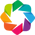

In [5]:
hvPlotters.setPlotters()
# import bokeh
# import holoviews as hv
# hv.extension('bokeh')

### Load data

In [6]:
# # Scan for subdirs, based on existing routine in getFiles()
fileBase = r'D:\VMs\Share\ePSshare\N2O\N20_wf'  # Test dir on Stimpy (Win machine)


In [7]:
N2Odata = ePSmultiJob(fileBase, verbose = 0)
keys = [0,1,2]  # Set for 1s datasets only (ugly!)
N2Odata.scanFiles(keys = keys)
N2Odata.jobsSummary()

Found 3 directories, with 21 files.

*** Job orb1 details
Key: orb1
Dir D:\VMs\Share\ePSshare\N2O\N20_wf\orb1_S, 7 files.
{   'batch': 'ePS N2O, batch N2O_wf, orbital orb1_S',
    'event': 'orb 1 ionization (O 1s, S/A1).',
    'orbE': -562.219888836424,
    'orbLabel': 'O 1s, S/A1'}

*** Job orb2 details
Key: orb2
Dir D:\VMs\Share\ePSshare\N2O\N20_wf\orb2_S, 7 files.
{   'batch': 'ePS N2O, batch N2O_wf, orbital orb2_S',
    'event': 'orb 2 ionization (N 1s, S/A1).',
    'orbE': -431.308631832806,
    'orbLabel': 'N 1s, S/A1'}

*** Job orb3 details
Key: orb3
Dir D:\VMs\Share\ePSshare\N2O\N20_wf\orb3_S, 7 files.
{   'batch': 'ePS N2O, batch N2O_wf, orbital orb3_S',
    'event': 'orb 3 ionization (N 1s, S/A1).',
    'orbE': -427.26774100883597,
    'orbLabel': 'N 1s, S/A1'}


## System properties
Here orbitals 1,2,3 are all core 1s orbitals, centred on:

1. O
2. N (central)
3. N (terminal)

*** Molecular structure


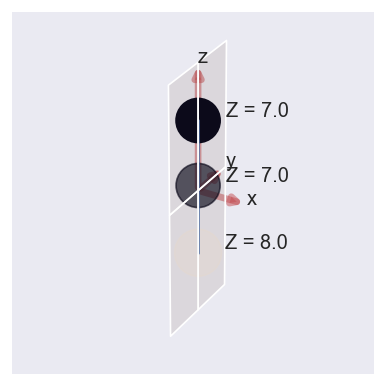


*** Molecular orbital list (from ePS output file)
EH = Energy (Hartrees), E = Energy (eV), NOrbGrp, OrbGrp, GrpDegen = degeneracies and corresponding orbital numbering by group in ePS, NormInt = single centre expansion convergence (should be ~1.0).


props Sym       EH  Occ           E  NOrbGrp  OrbGrp  GrpDegen   NormInt
orb                                                                     
1       S -20.6612  2.0 -562.219889      1.0     1.0       1.0  0.979634
2       S -15.8503  2.0 -431.308632      1.0     2.0       1.0  0.999998
3       S -15.7018  2.0 -427.267741      1.0     3.0       1.0  0.983661
4       S  -1.6338  2.0  -44.457962      1.0     4.0       1.0  0.999465
5       S  -1.4519  2.0  -39.508211      1.0     5.0       1.0  0.999243
6       S  -0.8306  2.0  -22.601777      1.0     6.0       1.0  0.999545
7       P  -0.7759  2.0  -21.113314      1.0     7.0       2.0  0.999991
8       P  -0.7759  2.0  -21.113314      2.0     7.0       2.0  0.999991
9       S  -0.6985  2.0  -19.007153      1.0     8.0       1.0  0.999692
10      P  -0.4961  2.0  -13.499569      1.0     9.0       2.0  0.999984
11      P  -0.4961  2.0  -13.499569      2.0     9.0       2.0  0.999984


*** Warning: some orbital convergences outside single-center expansion convergence tolerance (0.01):
[[1.         0.97963433]
 [3.         0.98366107]]


In [8]:
N2Odata.molSummary()

In [13]:
# Quick manual fix for orb/job labels

N2Odata.jobLabel(key='orb1', lString = "(central)")
N2Odata.jobLabel(key='orb2', lString = "(terminal)")

## Plot cross-sections and betas

These are from ePolyScat's `getCro` function, and are LF (unaligned ensemble) results. This provides a good, if general, overview.

### Overview (all symmetries)

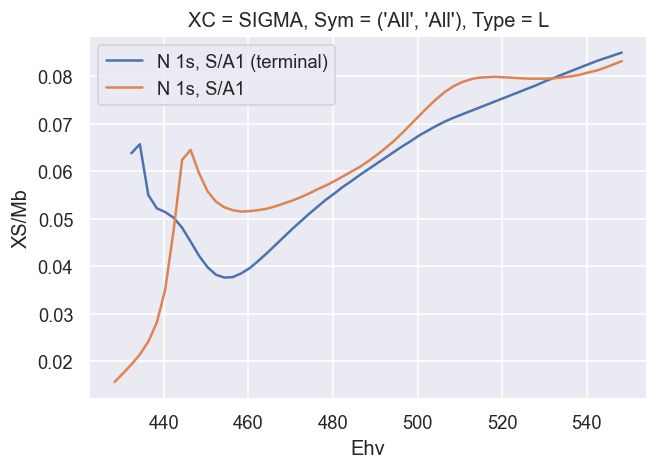

In [14]:
# Comparitive plot over datasets (all symmetries only)
Erange=[400, 550]
N2Odata.plotGetCroComp(pType='SIGMA', Etype='Ehv', Erange=Erange)

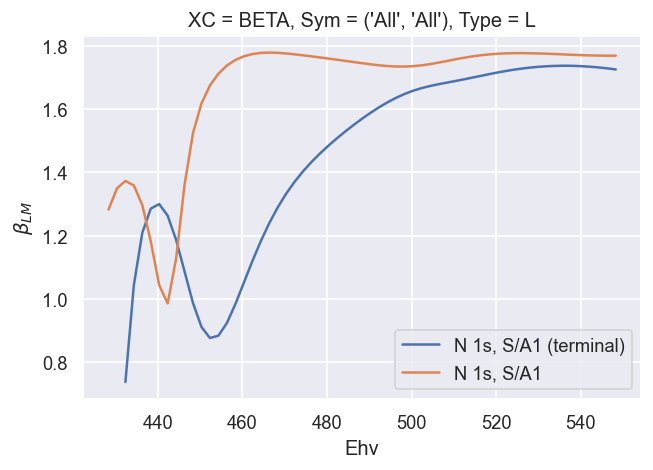

In [15]:
# Comparitive plot over datasets (all symmetries only)
N2Odata.plotGetCroComp(pType='BETA', Etype='Ehv', Erange=Erange)

A few comments:

- The two N(1s) channels are similar in XS, but show some differences in $\beta_2$ parameter. This is indicative of some phase differences in the partial-waves between the two channels, but indicates there is likely little change in the partial cross-sections.
- The O(1s) channel shows more structure (as expected, since it's near-threshold), in both $\sigma$ and $\beta_2$. This is indicative of significant changes in both partial-wave amplitude and phase over this region.
- Assuming that one aims to extract relative phase differences (equivalently, time-delays) between the channels, these will likely be quite sensitive to the photon energy over the O(1s) threshold region, but will show less energy sensitivity > ~590eV.

These are fairly broad statements, the matrix elements will be examined in more detail below...

### Continua and gauge specific results
This gives an idea of the relative contributions of different symmetry channels, and the variation in the results between length (L) and velocity (V) gauge results, hence computational accuracy.

- The allowed symmetries are S ($\sigma$) and P ($\pi$).
- The (continuum) symmetries are correlated with parallel or perpendicular polarization geometries in the molecular frame ($\mu=0$ and $\mu=\pm1$ respectively). In the lab frame (LF) or aligned frame (AF) these will be mixed to some degree, depending on the alignment.

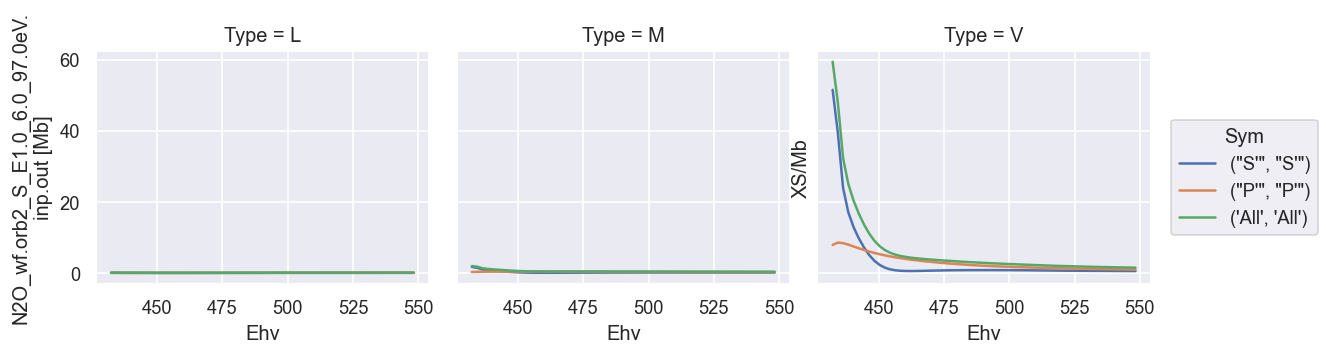

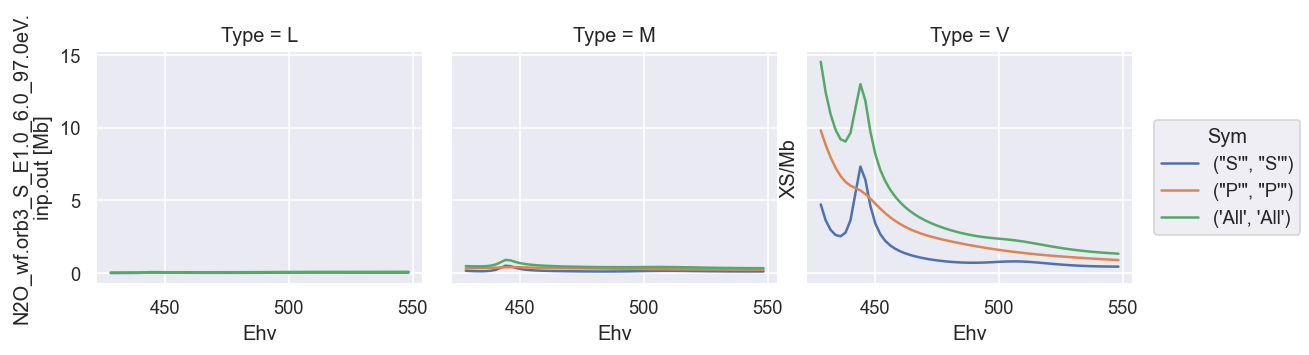

In [16]:
N2Odata.plotGetCro(pType='SIGMA', Etype='Ehv', Erange=Erange)

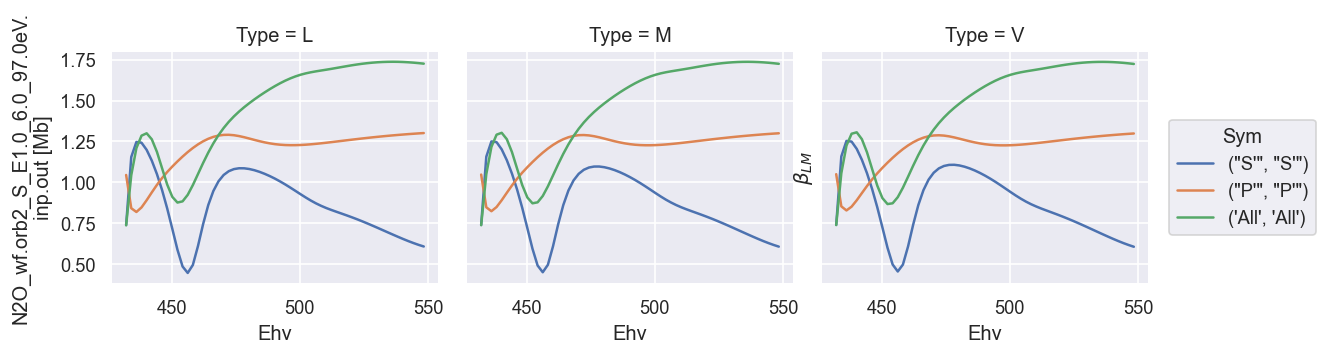

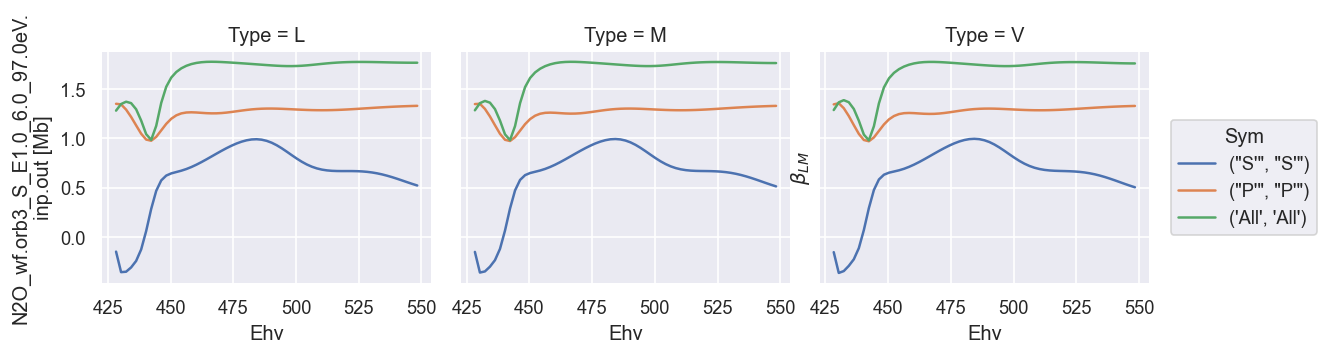

In [17]:
N2Odata.plotGetCro(pType='BETA', Etype='Ehv', Erange=Erange)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
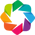


*** N 1s, S/A1


:Layout
   .Overlay.I  :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
   .Overlay.II :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)


*** N 1s, S/A1


:Layout
   .Overlay.I  :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (sigma,Type)
   .Overlay.II :Overlay
      .NdOverlay.I   :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.II  :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)
      .NdOverlay.III :NdOverlay   [Cont]
         :Curve   [Ehv]   (beta,Type)

In [18]:
# Interactive version of the above.
# Here the L, V gauges are shown as dashed lines, and the mixed gauge solid. Both sigma and beta data is shown.
# Mouse-over plots for data details, and use controls in top corner.

hvPlotters.setPlotters(width=800)
N2Odata.plotGetCro(Etype='Ehv', Erange=Erange, backend = 'hv')

Here it's clear that there is approximately an order of magnitude difference in the absolute cross-sections (in Mb) between L and V gauges, but the energy dependence and $\beta_2$ are very similar, so this probably won't be an issue for angle-resolved observables.

## Raw matrix elements

Below are strip-charts showing the raw matrix elements for each channel (abs values) and symmetry group. 

Here: 

- The matrix elements are indexed by (Symmetry, l, m, mu), where (l,m) are the usual partial-wave indicies (corresponding to photoelectron angular momentum), and mu defines the photon angular momentum.
- The symmetries are labelled as Cont(inuum), Targ(et) and Total, corresponding to [the definitions here](https://epsproc.readthedocs.io/en/latest/ePS_ePSproc_tutorial/ePS_tutorial_080520.html#Worked-example:-N2-3\sigma_g^{-1}).
- The allowed symmetries are S ($\sigma$) and P ($\pi$).
- The (continuum) symmetries are correlated with parallel or perpendicular polarization geometries in the molecular frame ($\mu=0$ and $\mu=\pm1$ respectively). In the lab frame (LF) or aligned frame (AF) these will be mixed to some degree, depending on the alignment.

### Abs values
The plots are thresholded based on the abs values, at 10% of the maximum value (per channel), and values below threshold are greyed out.

Plotting data N2O_wf.orb2_S_E1.0_6.0_97.0eV.inp.out, pType=a, thres=0.03381427021166804, with Seaborn
Plotting data N2O_wf.orb3_S_E1.0_6.0_97.0eV.inp.out, pType=a, thres=0.018736579963286943, with Seaborn


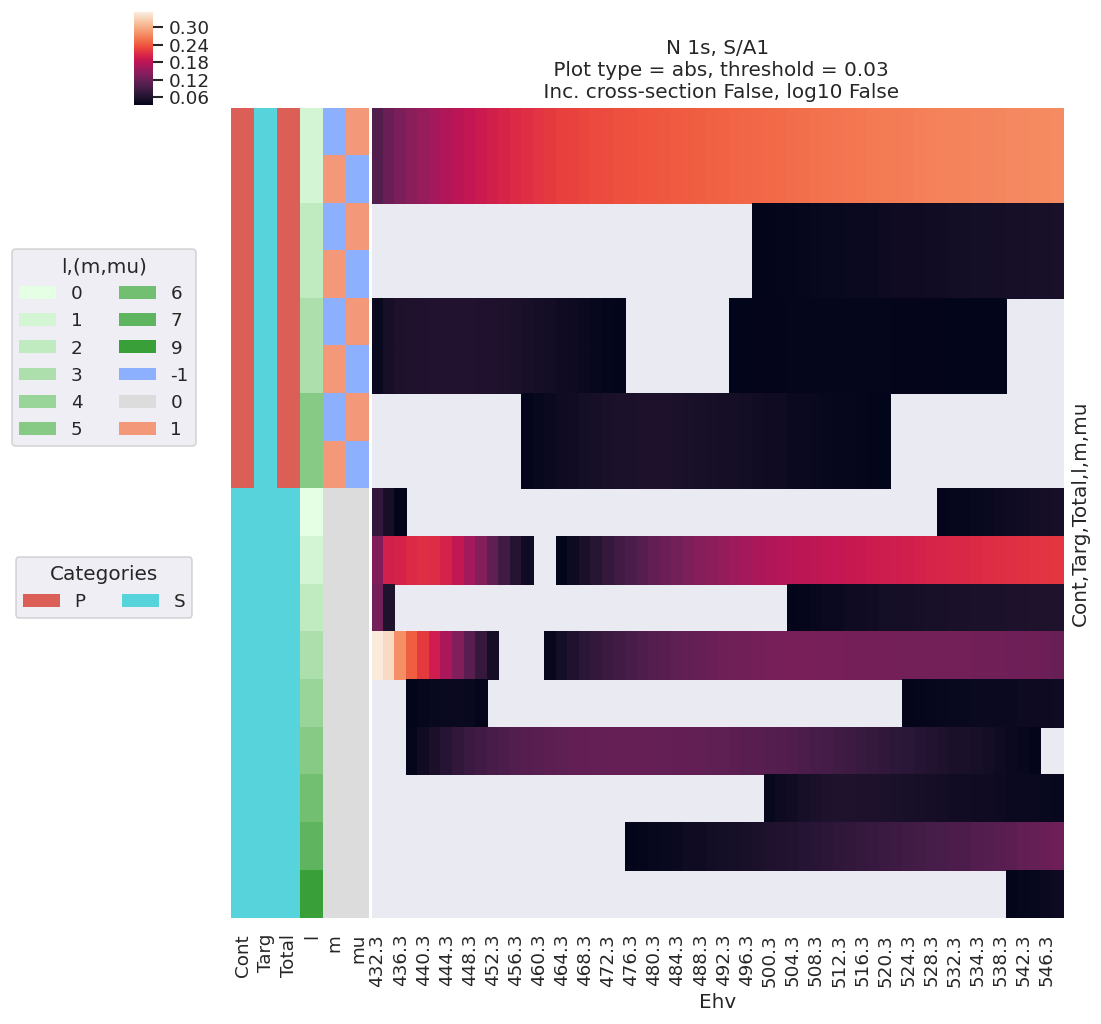

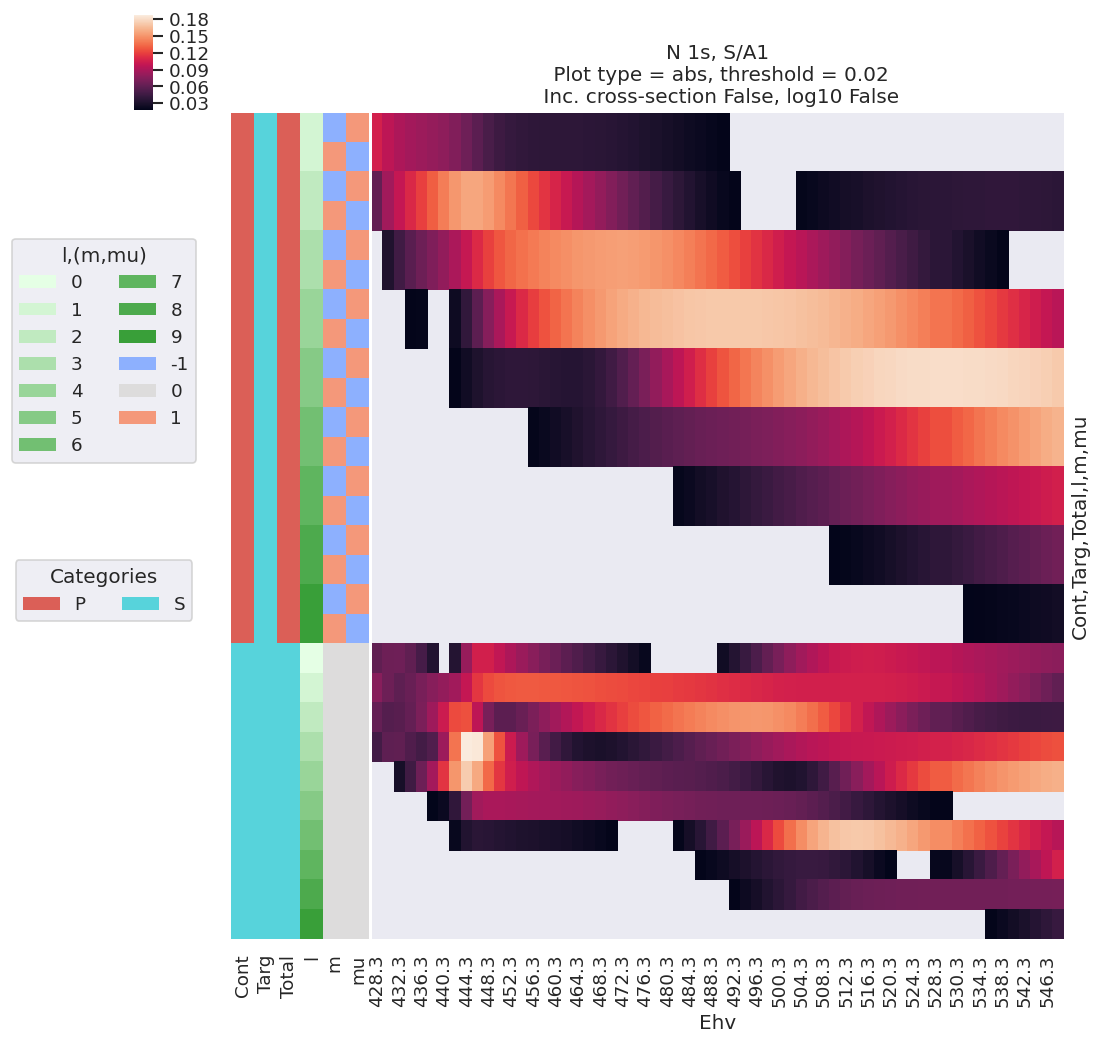

In [19]:
N2Odata.lmPlotOpts = {'selDims' : {'Type':'L', 'it' : 1}, 'fillna' : False, 'thres' : 0.1, 'thresType' : 'pc', 'SFflag' : False}
N2Odata.lmPlot(Etype='Ehv', Erange=Erange)

### Phases
And the phases... (with unwrapping).

C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1535: RuntimeWarning: invalid value encountered in remainder
  ddmod = mod(dd + pi, 2*pi) - pi


Plotting data N2O_wf.orb2_S_E1.0_6.0_97.0eV.inp.out, pType=phaseUW, thres=0.03381427021166804, with Seaborn


C:\Users\femtolab\.conda\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1535: RuntimeWarning: invalid value encountered in remainder
  ddmod = mod(dd + pi, 2*pi) - pi


Plotting data N2O_wf.orb3_S_E1.0_6.0_97.0eV.inp.out, pType=phaseUW, thres=0.018736579963286943, with Seaborn


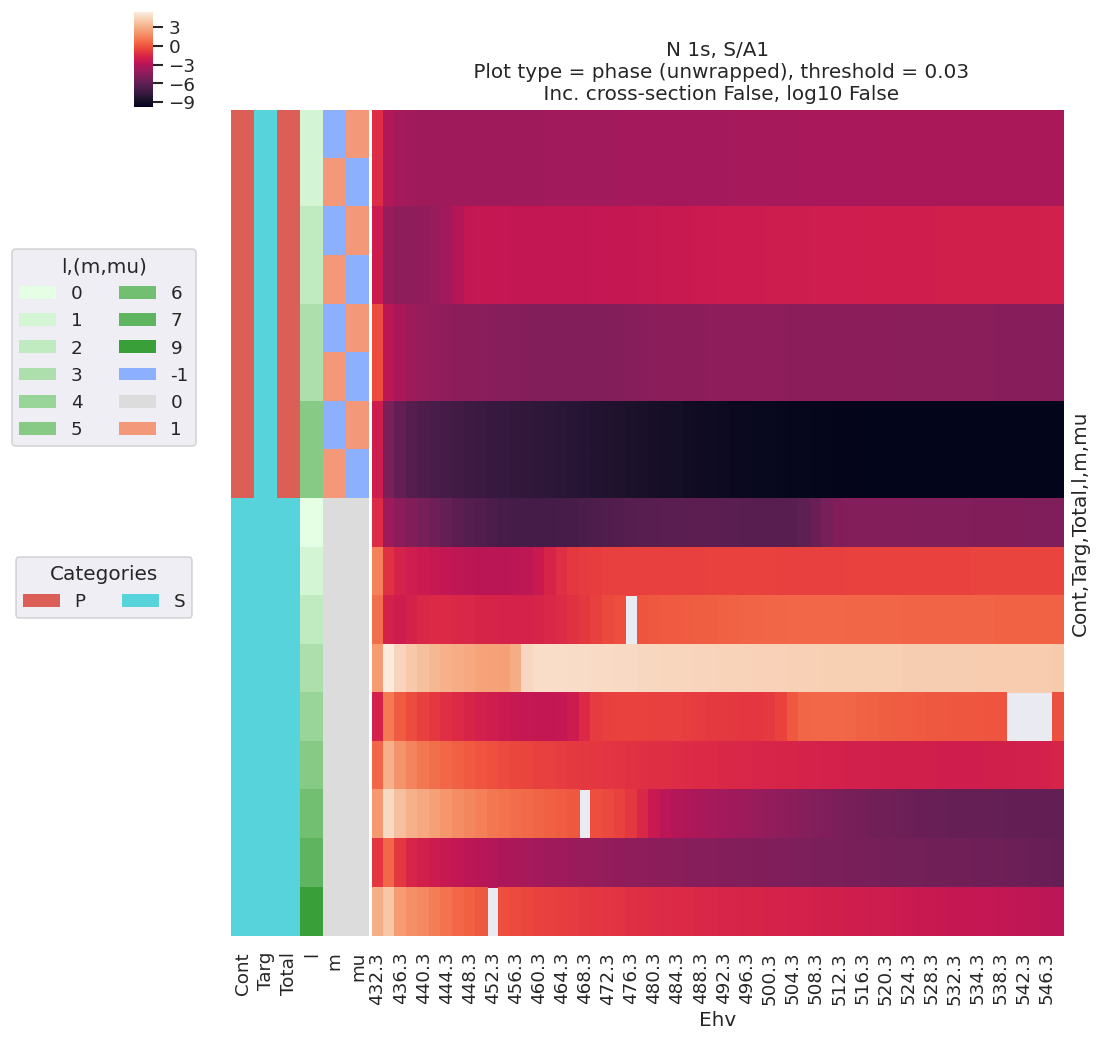

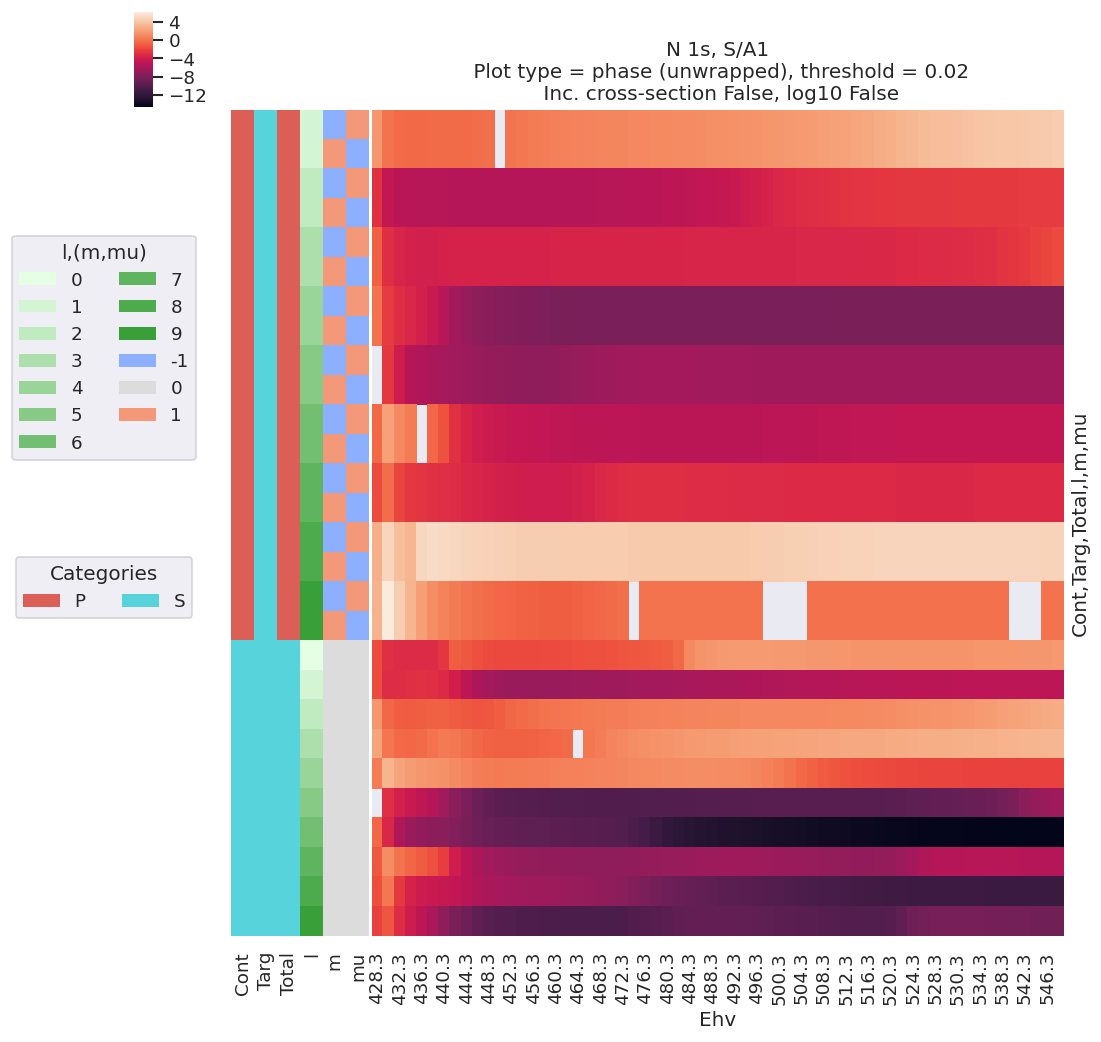

In [20]:
N2Odata.lmPlot(Etype='Ehv', Erange=Erange, pType='phaseUW')

### Comments

- As expected, for the N(1s) channels the magnitudes and phases of the partial-waves are relatively flat, although there are some not insignificant changes in the terminal-N channel. 
- For O(1s), there is quite a bit going on, especially in the parallel (S) continuum. These comparisons will become a little clearer with difference plots...
- For the N-channels, the ionization of the central N(1s) core is dominated by $l=1$, although there is a significant admixture of higher $l$, while the terminal N(1s) case shows more significant higher order contributions.

## Matix element difference plots

A little crude, this just shows the partial wave phase differences vs. a reference case (set here for O(1s)). This will, therefore, be related to relative delays (which are the energy-derivative of the phases), but missing any sense of the relative contributions. More to come on this in pt. 2!

In [ ]:
Erange = [563, 620]  # Clip Erange to > O(1s) threshold for diff plotting

# N2Odata.lmPlotOpts = {'selDims' : {'Type':'L', 'it' : 1, 'Cont':'S', 'Total':'S'}, 'fillna' : False, 'thres' : None, 'SFflag' : False}
# N2Odata.lmPlotOpts = {'selDims' : {'Type':'L', 'it' : 1}, 'fillna' : True, 'thres' : 0.1, 'SFflag' : False}
N2Odata.lmPlot(Etype='Ehv', Erange=Erange, refDataKey = [0,0], reindexTol=1.0, keys=[1,2], pType='phaseUW')

## Versions

In [22]:
import scooby
scooby.Report(additional=['epsproc', 'xarray', 'jupyter'])

--------------------------------------------------------------------------------
  Date: Sun Nov 15 10:49:41 2020 Eastern Standard Time

                OS : Windows
            CPU(s) : 32
           Machine : AMD64
      Architecture : 64bit
               RAM : 63.9 GB
       Environment : Jupyter

  Python 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]

           epsproc : 1.3.0-dev
            xarray : 0.15.0
           jupyter : Version unknown
             numpy : 1.19.2
             scipy : 1.3.0
           IPython : 7.12.0
        matplotlib : 3.3.1
            scooby : 0.5.6

  Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191125 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------

## Appendix - tabulated values
For reference... source files will be uploaded to Zenodo soon.

In [23]:
N2Odata.matEtoPD(xDim = 'Ehv', Erange=Erange, thres=0.1, selDims = {'Type':'L'}) #TODO ADD Ehv swap, Erange


*** O 1s, S/A1
Matrix element table, threshold=0.1, data type=complex128.


Ehv                                      573.2               575.2  \
Cont Targ Total it l m  mu                                           
P    S    P     1  2 -1  1 -0.068823-0.080809j -0.075688-0.084354j   
                      1 -1 -0.068823-0.080809j -0.075688-0.084354j   
                   3 -1  1                 NaN                 NaN   
                      1 -1                 NaN                 NaN   
                   4 -1  1                 NaN                 NaN   
                      1 -1                 NaN                 NaN   
S    S    S     1  1  0  0                 NaN                 NaN   
                   2  0  0                 NaN                 NaN   
                   3  0  0                 NaN                 NaN   
                   4  0  0                 NaN                 NaN   

Ehv                                      577.2               579.2  \
Cont Targ Total it l m  mu                                           
P    S    P     1  2 -1  1 -0.082300-0.085615j -0.087072-0.083841j   
                      1 -1 -0.082300-0.085615j -0.087072-0.083841j   
                   3 -1  1                 NaN                 NaN   
                      1 -1                 NaN                 NaN   
                   4 -1  1                 NaN                 NaN   
                      1 -1                 NaN                 NaN   
S    S    S     1  1  0  0                 NaN                 NaN   
                   2  0  0                 NaN                 NaN   
                   3  0  0                 NaN                 NaN   
                   4  0  0                 NaN -0.066001-0.077226j   

Ehv                                      581.2               583.2  \
Cont Targ Total it l m  mu                                           
P    S    P     1  2 -1  1 -0.088571-0.080121j -0.086880-0.076185j   
                      1 -1 -0.088571-0.080121j -0.086880-0.076185j   
                   3 -1  1                 NaN -0.085859+0.053544j   
                      1 -1                 NaN -0.085859+0.053544j   
                   4 -1  1                 NaN                 NaN   
                      1 -1                 NaN                 NaN   
S    S    S     1  1  0  0                 NaN                 NaN   
                   2  0  0                 NaN -0.086295+0.066616j   
                   3  0  0                 NaN  0.087326-0.059161j   
                   4  0  0 -0.099654-0.064792j -0.114082-0.025549j   

Ehv                                      585.2               587.2  \
Cont Targ Total it l m  mu                                           
P    S    P     1  2 -1  1 -0.083082-0.072994j -0.078225-0.070657j   
                      1 -1 -0.083082-0.072994j -0.078225-0.070657j   
                   3 -1  1 -0.090273+0.056454j -0.094216+0.058501j   
                      1 -1 -0.090273+0.056454j -0.094216+0.058501j   
                   4 -1  1                 NaN                 NaN   
                      1 -1                 NaN                 NaN   
S    S    S     1  1  0  0                 NaN                 NaN   
                   2  0  0 -0.071263+0.079046j                 NaN   
                   3  0  0  0.069463-0.072216j                 NaN   
                   4  0  0                 NaN                 NaN   

Ehv                                      589.2               591.2  ...  \
Cont Targ Total it l m  mu                                          ...   
P    S    P     1  2 -1  1 -0.072961-0.068928j                 NaN  ...   
                      1 -1 -0.072961-0.068928j                 NaN  ...   
                   3 -1  1 -0.097923+0.059803j -0.101499+0.060543j  ...   
                      1 -1 -0.097923+0.059803j -0.101499+0.060543j  ...   
                   4 -1  1                 NaN                 NaN  ...   
                      1 -1                 NaN                 NaN  ...   
S    S    S     1  1  0  0          


*** N 1s, S/A1
Matrix element table, threshold=0.1, data type=complex128.


Ehv                                      564.3               566.3  \
Cont Targ Total it l m  mu                                           
P    S    P     1  1 -1  1 -0.278608+0.022574j -0.279035+0.021260j   
                      1 -1 -0.278608+0.022574j -0.279035+0.021260j   
S    S    S     1  1  0  0  0.194482-0.096051j  0.193371-0.095253j   
                   3  0  0 -0.057654-0.085279j -0.055934-0.083647j   
                   7  0  0  0.139291+0.024249j  0.140943+0.016115j   

Ehv                                      568.3               570.3  \
Cont Targ Total it l m  mu                                           
P    S    P     1  1 -1  1 -0.279427+0.019963j -0.279786+0.018681j   
                      1 -1 -0.279427+0.019963j -0.279786+0.018681j   
S    S    S     1  1  0  0  0.192224-0.094188j  0.191088-0.092863j   
                   3  0  0                 NaN                 NaN   
                   7  0  0  0.141630+0.007860j  0.141350-0.000348j   

Ehv                                      572.3               574.3  \
Cont Targ Total it l m  mu                                           
P    S    P     1  1 -1  1 -0.280112+0.017414j -0.280407+0.016162j   
                      1 -1 -0.280112+0.017414j -0.280407+0.016162j   
S    S    S     1  1  0  0  0.190008-0.091295j  0.189023-0.089512j   
                   3  0  0                 NaN                 NaN   
                   7  0  0  0.140139-0.008350j  0.138067-0.016000j   

Ehv                                      576.3               578.3  \
Cont Targ Total it l m  mu                                           
P    S    P     1  1 -1  1 -0.280670+0.014926j -0.280904+0.013704j   
                      1 -1 -0.280670+0.014926j -0.280904+0.013704j   
S    S    S     1  1  0  0  0.188164-0.087545j  0.187450-0.085431j   
                   3  0  0                 NaN                 NaN   
                   7  0  0  0.135230-0.023178j  0.131741-0.029792j   

Ehv                                      580.3               582.3  ...  \
Cont Targ Total it l m  mu                                          ...   
P    S    P     1  1 -1  1 -0.281108+0.012497j -0.281283+0.011305j  ...   
                      1 -1 -0.281108+0.012497j -0.281283+0.011305j  ...   
S    S    S     1  1  0  0  0.186896-0.083207j  0.186505-0.080909j  ...   
                   3  0  0                 NaN                 NaN  ...   
                   7  0  0  0.127723-0.035782j  0.123298-0.041115j  ...   

Ehv                                      600.3               602.3  \
Cont Targ Total it l m  mu                                           
P    S    P     1  1 -1  1 -0.281703+0.001207j -0.281634+0.000153j   
                      1 -1 -0.281703+0.001207j -0.281634+0.000153j   
S    S    S     1  1  0  0  0.188812-0.060919j  0.189464-0.059007j   
                   3  0  0                 NaN                 NaN   
                   7  0  0  0.080188-0.063021j                 NaN   

Ehv                                      604.3               606.3  \
Cont Targ Total it l m  mu                                           
P    S    P     1  1 -1  1 -0.281544-0.000888j -0.281435-0.001916j   
                      1 -1 -0.281544-0.000888j -0.281435-0.001916j   
S    S    S     1  1  0  0  0.190151-0.057172j  0.190861-0.055413j   
                   3  0  0                 NaN                 NaN   
                   7  0  0                 NaN                 NaN   

Ehv                                      608.3               610.3  \
Cont Targ Total it l m  mu                                           
P    S    P     1  1 -1  1 -0.281306-0.002931j -0.281158-0.003933j   
                      1 -1 -0.281306-0.002931j -0.281158-0.003933j   
S    S    S     1  1  0  0  0.191587-0.053727j  0.192323-0.052112j   
                   3  0  0                 NaN                 NaN   
                   7  0  0                 NaN                 NaN   

Ehv                                  


*** N 1s, S/A1
Matrix element table, threshold=0.1, data type=complex128.


Ehv                                      564.3               566.3  \
Cont Targ Total it l m  mu                                           
P    S    P     1  5 -1  1  0.155054-0.007483j  0.152325-0.007092j   
                      1 -1  0.155054-0.007483j  0.152325-0.007092j   
                   6 -1  1 -0.015385+0.177233j -0.015186+0.178197j   
                      1 -1 -0.015385+0.177233j -0.015186+0.178197j   
                   7 -1  1 -0.122288-0.006426j -0.124387-0.007784j   
                      1 -1 -0.122288-0.006426j -0.124387-0.007784j   
                   8 -1  1                 NaN                 NaN   
                      1 -1                 NaN                 NaN   
S    S    S     1  2  0  0                 NaN                 NaN   
                   3  0  0 -0.122802-0.031178j -0.120461-0.031967j   
                   4  0  0 -0.058993-0.155662j -0.057528-0.155636j   
                   5  0  0                 NaN                 NaN   
                   7  0  0  0.137827+0.077514j  0.144507+0.071531j   

Ehv                                      568.3               570.3  \
Cont Targ Total it l m  mu                                           
P    S    P     1  5 -1  1  0.149480-0.006718j  0.146523-0.006361j   
                      1 -1  0.149480-0.006718j  0.146523-0.006361j   
                   6 -1  1 -0.014985+0.178961j -0.014786+0.179531j   
                      1 -1 -0.014985+0.178961j -0.014786+0.179531j   
                   7 -1  1 -0.126493-0.009150j -0.128603-0.010514j   
                      1 -1 -0.126493-0.009150j -0.128603-0.010514j   
                   8 -1  1                 NaN                 NaN   
                      1 -1                 NaN                 NaN   
S    S    S     1  2  0  0                 NaN                 NaN   
                   3  0  0 -0.117635-0.032666j -0.114349-0.033322j   
                   4  0  0 -0.055886-0.155410j -0.054073-0.154991j   
                   5  0  0                 NaN  0.102416+0.002233j   
                   7  0  0  0.150092+0.064778j  0.154498+0.057441j   

Ehv                                      572.3               574.3  \
Cont Targ Total it l m  mu                                           
P    S    P     1  5 -1  1  0.143459-0.006019j  0.140293-0.005692j   
                      1 -1  0.143459-0.006019j  0.140293-0.005692j   
                   6 -1  1 -0.014593+0.179912j -0.014406+0.180110j   
                      1 -1 -0.014593+0.179912j -0.014406+0.180110j   
                   7 -1  1 -0.130711-0.011868j -0.132813-0.013205j   
                      1 -1 -0.130711-0.011868j -0.132813-0.013205j   
                   8 -1  1                 NaN  0.007664-0.099768j   
                      1 -1                 NaN  0.007664-0.099768j   
S    S    S     1  2  0  0                 NaN                 NaN   
                   3  0  0 -0.110638-0.033976j -0.106543-0.034664j   
                   4  0  0 -0.052095-0.154391j -0.049961-0.153621j   
                   5  0  0  0.110235+0.000091j  0.117656-0.002417j   
                   7  0  0  0.157685+0.049715j  0.159650+0.041788j   

Ehv                                      576.3               578.3  \
Cont Targ Total it l m  mu                                           
P    S    P     1  5 -1  1  0.137029-0.005380j  0.133674-0.005080j   
                      1 -1  0.137029-0.005380j  0.133674-0.005080j   
                   6 -1  1 -0.014227+0.180132j -0.014058+0.179982j   
                      1 -1 -0.014227+0.180132j -0.014058+0.179982j   
                   7 -1  1 -0.134901-0.014517j -0.136971-0.015797j   
                      1 -1 -0.134901-0.014517j -0.136971-0.015797j   
                   8 -1  1  0.007636-0.101876j  0.007640-0.103923j   
                      1 -1  0.007636-0.101876j  0.007640-0.103923j   
S    S    S     1  2  0  0                 NaN                 NaN   
                   3  0  0 -0.102111-0.035411j -0.097393-0.036236j   
       